### Seaborn Heatmap Tutorial with CO2 Emissions Dataset

### Step 1: Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Why:** We need pandas for data manipulation, seaborn for visualization, matplotlib for customization, and numpy for numerical operations.

### Step 2: Load and Prepare Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Who_is_responsible_for_global_warming.csv to Who_is_responsible_for_global_warming.csv


In [ ]:
# Load the dataset
df = pd.read_csv('Who_is_responsible_for_global_warming.csv')

# Display first few rows to understand structure
print("Dataset shape:", df.shape)
print("\nFirst 3 rows:")
print(df.head(3))
print("\nColumn names:")
print(df.columns.tolist())

Dataset shape: (15, 19)

First 3 rows:
     Country Name Country Code                          Indicator Name  \
0   United States          USA  CO2 emissions (metric tons per capita)   
1  United Kingdom          GBR  CO2 emissions (metric tons per capita)   
2           India          IND  CO2 emissions (metric tons per capita)   

   Indicator Code       2000       2001       2002       2003       2004  \
0  EN.ATM.CO2E.PC  20.178751  19.636505  19.613404  19.564105  19.658371   
1  EN.ATM.CO2E.PC   9.199549   9.233175   8.904123   9.053278   8.989140   
2  EN.ATM.CO2E.PC   0.979870   0.971698   0.967381   0.992392   1.025028   

        2005       2006       2007       2008       2009       2010  \
0  19.591885  19.094067  19.217898  18.461764  17.157738  17.442862   
1   8.982939   8.898710   8.617164   8.424424   7.574622   7.857836   
2   1.068563   1.121982   1.193210   1.310098   1.431844   1.397009   

        2011       2012       2013       2014  
0  16.976957  16.310471  1

**Why:** We need to inspect the data structure. The dataset has years as columns, but for a heatmap, we need a matrix format.

### Step 3: Reshape Data for Heatmap

In [ ]:
# Select only year columns (2000-2014)
year_columns = [str(year) for year in range(2000, 2015)]

# Create a new DataFrame with countries as rows and years as columns
heatmap_data = df.set_index('Country Name')[year_columns]

# Convert to numeric (just in case)
heatmap_data = heatmap_data.apply(pd.to_numeric, errors='coerce')

print("Heatmap data shape:", heatmap_data.shape)
print("\nData preview:")
print(heatmap_data.head())

Heatmap data shape: (15, 15)

Data preview:
                         2000       2001       2002       2003       2004  \
Country Name                                                                
United States       20.178751  19.636505  19.613404  19.564105  19.658371   
United Kingdom       9.199549   9.233175   8.904123   9.053278   8.989140   
India                0.979870   0.971698   0.967381   0.992392   1.025028   
China                2.696862   2.742121   3.007083   3.524074   4.037991   
Russian Federation  10.627121  10.669603  10.715901  11.090647  11.120627   

                         2005       2006       2007       2008       2009  \
Country Name                                                                
United States       19.591885  19.094067  19.217898  18.461764  17.157738   
United Kingdom       8.982939   8.898710   8.617164   8.424424   7.574622   
India                1.068563   1.121982   1.193210   1.310098   1.431844   
China                4.523178  

**Why:** Heatmaps require a 2D matrix format where rows and columns are meaningful dimensions.

### Step 4: Basic Heatmap

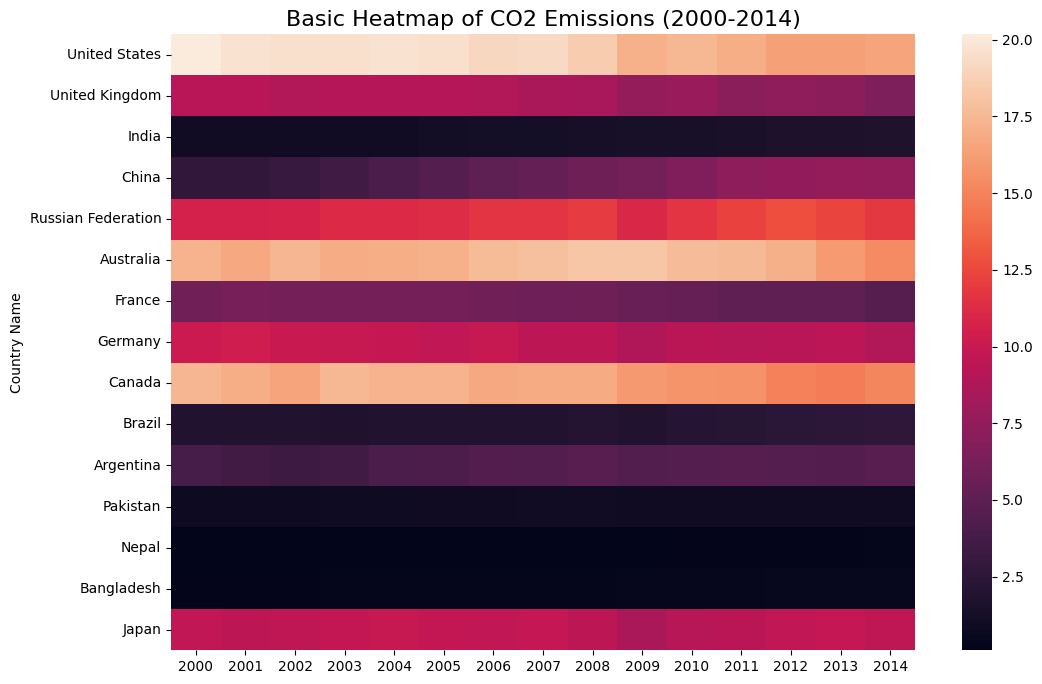

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=heatmap_data)
plt.title('Basic Heatmap of CO2 Emissions (2000-2014)', fontsize=16)
plt.show()

**Why:** This gives us a baseline visualization to see patterns in the data.

### Step 5: Enhanced Heatmap with Parameters Explained

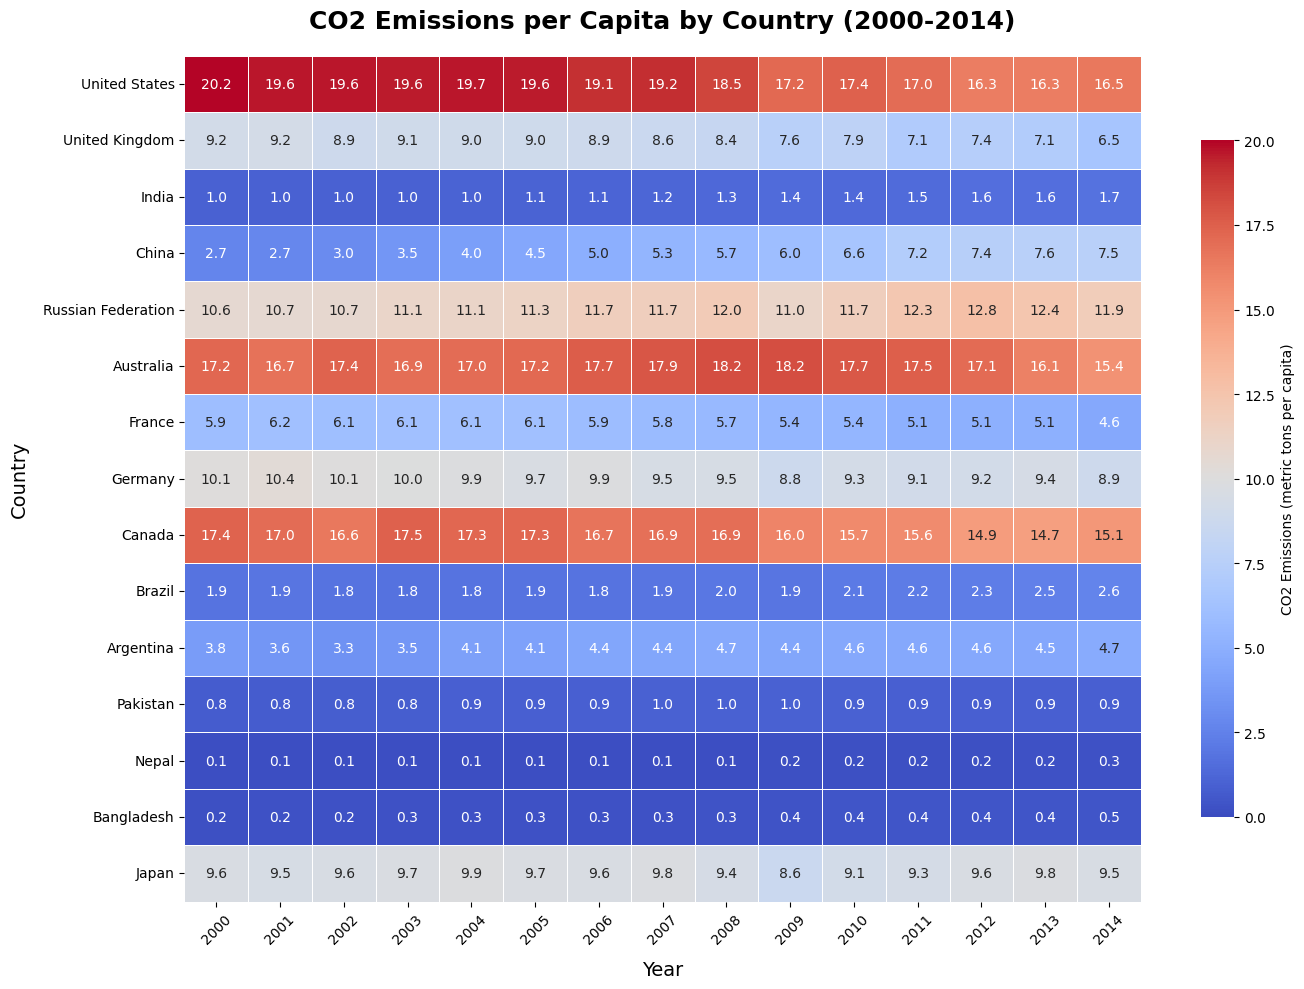

In [ ]:
plt.figure(figsize=(14, 10))

# Create the enhanced heatmap
heatmap = sns.heatmap(
    # PARAMETER 1: data - The 2D dataset/matrix
    data=heatmap_data,

    # PARAMETER 2: annot - Show actual values in cells
    annot=True,

    # PARAMETER 3: fmt - Format numbers to 2 decimal places
    fmt=".1f",

    # PARAMETER 4: cmap - Color palette
    # "coolwarm": Blue (low) to Red (high)
    # Alternatives: "viridis", "YlGnBu", "RdYlBu_r"
    cmap="coolwarm",

    # PARAMETER 5: linewidths - Thickness of grid lines
    linewidths=0.5,

    # PARAMETER 6: linecolor - Color of grid lines
    linecolor='white',

    # PARAMETER 7: cbar - Show color bar legend
    cbar=True,

    # PARAMETER 8: square - Make cells square-shaped
    square=False,

    # PARAMETER 9: xticklabels, yticklabels - Control axis labels
    xticklabels=True,
    yticklabels=True,

    # PARAMETER 10: vmin, vmax - Fix color scale range
    # This helps compare across multiple heatmaps
    vmin=0,
    vmax=20,

    # Additional useful parameters:
    cbar_kws={'label': 'CO2 Emissions (metric tons per capita)',
              'shrink': 0.8},

    # Center color at a specific value (useful for divergence)
    center=10
)

plt.title('CO2 Emissions per Capita by Country (2000-2014)',
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=14, labelpad=10)
plt.ylabel('Country', fontsize=14, labelpad=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Step 6: Customized Heatmap with Interpretation

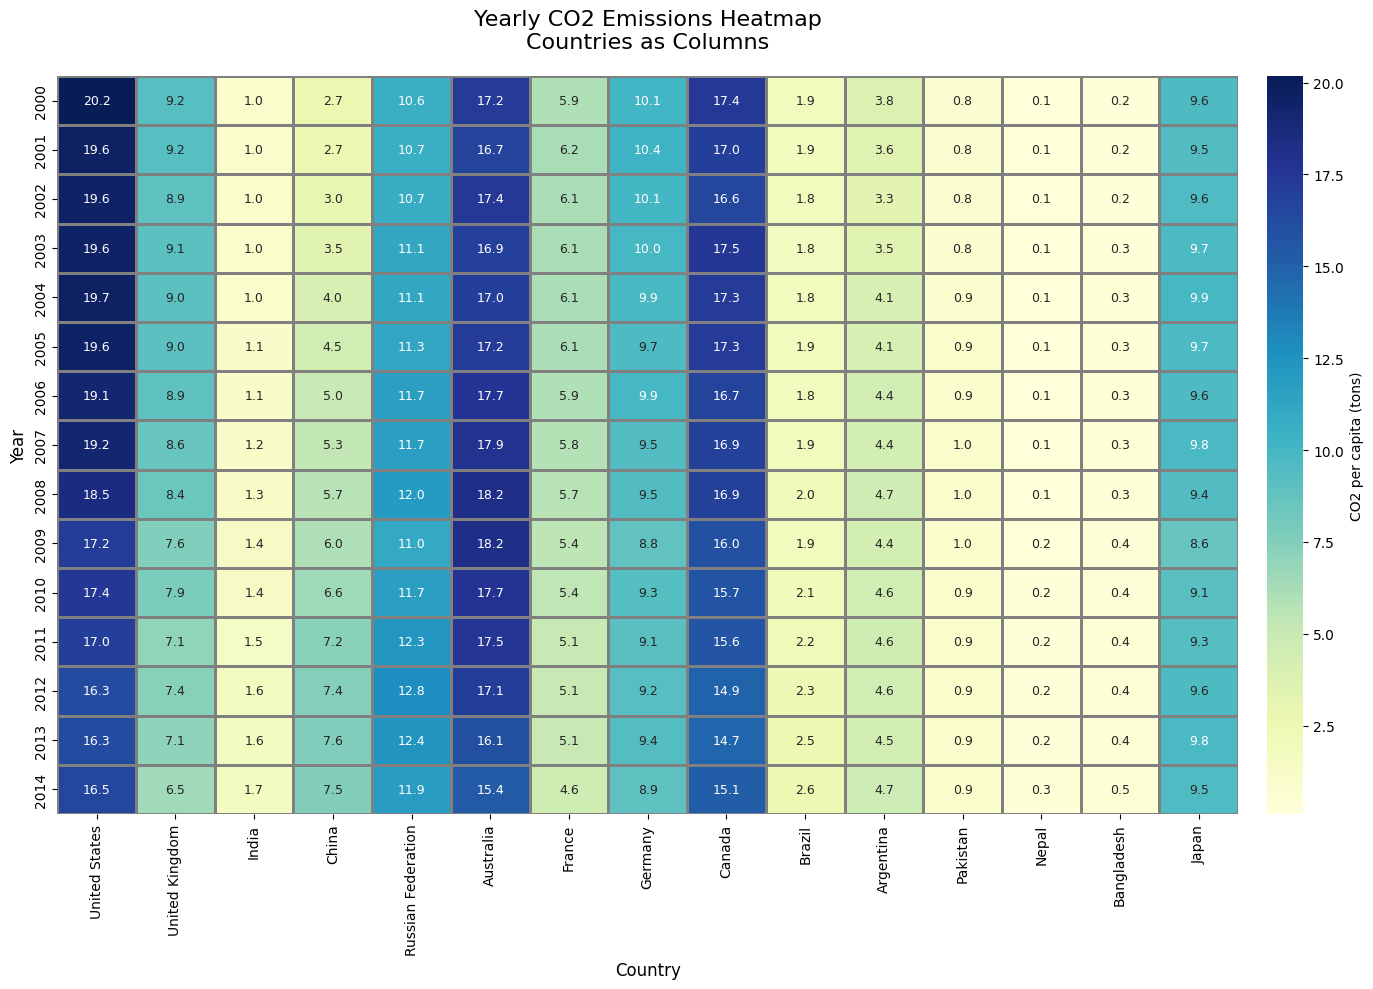

In [ ]:
plt.figure(figsize=(15, 10))

# Transpose to see years as rows (alternative view)
transposed_data = heatmap_data.T

sns.heatmap(
    data=transposed_data,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",  # Sequential palette - good for environmental data
    linewidths=1,
    linecolor='gray',
    cbar_kws={
        'label': 'CO2 per capita (tons)',
        'orientation': 'vertical',
        'pad': 0.02
    },
    annot_kws={"size": 9}  # Control annotation font size
)

plt.title('Yearly CO2 Emissions Heatmap\nCountries as Columns',
          fontsize=16, pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=90)  # Rotate country names for readability
plt.tight_layout()
plt.show()

### Step 7: Correlation Heatmap

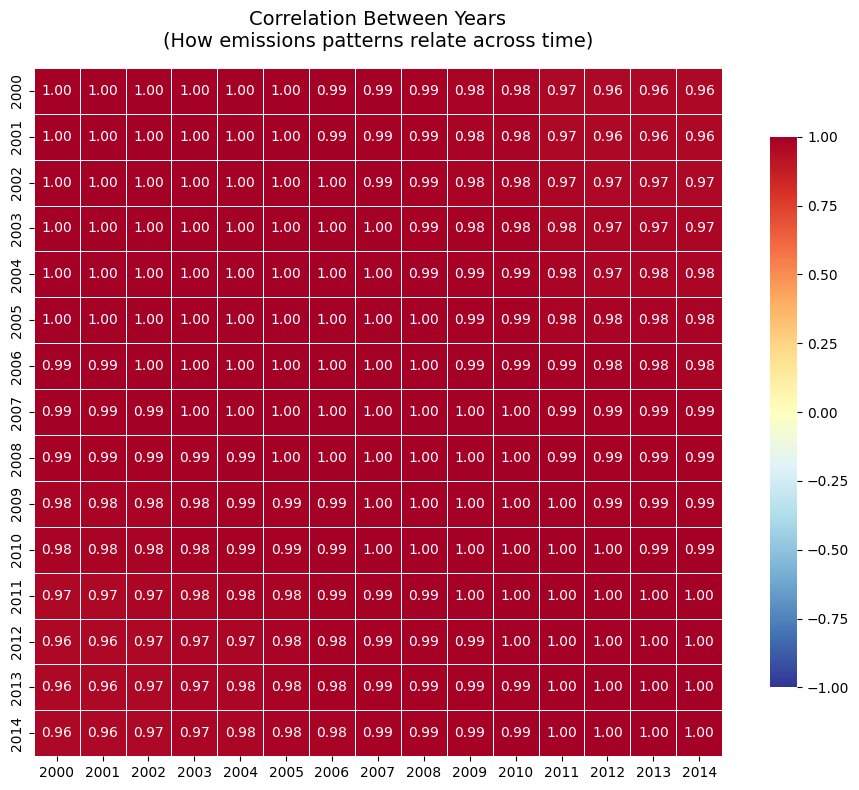

In [ ]:
# Calculate correlation between years
correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    data=correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdYlBu_r",  # Red-Yellow-Blue reversed (diverging palette)
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.8},
    vmin=-1,  # Minimum correlation value
    vmax=1    # Maximum correlation value
)

plt.title('Correlation Between Years\n(How emissions patterns relate across time)',
          fontsize=14, pad=15)
plt.tight_layout()
plt.show()

### Step 8: Top/Bottom Countries Analysis

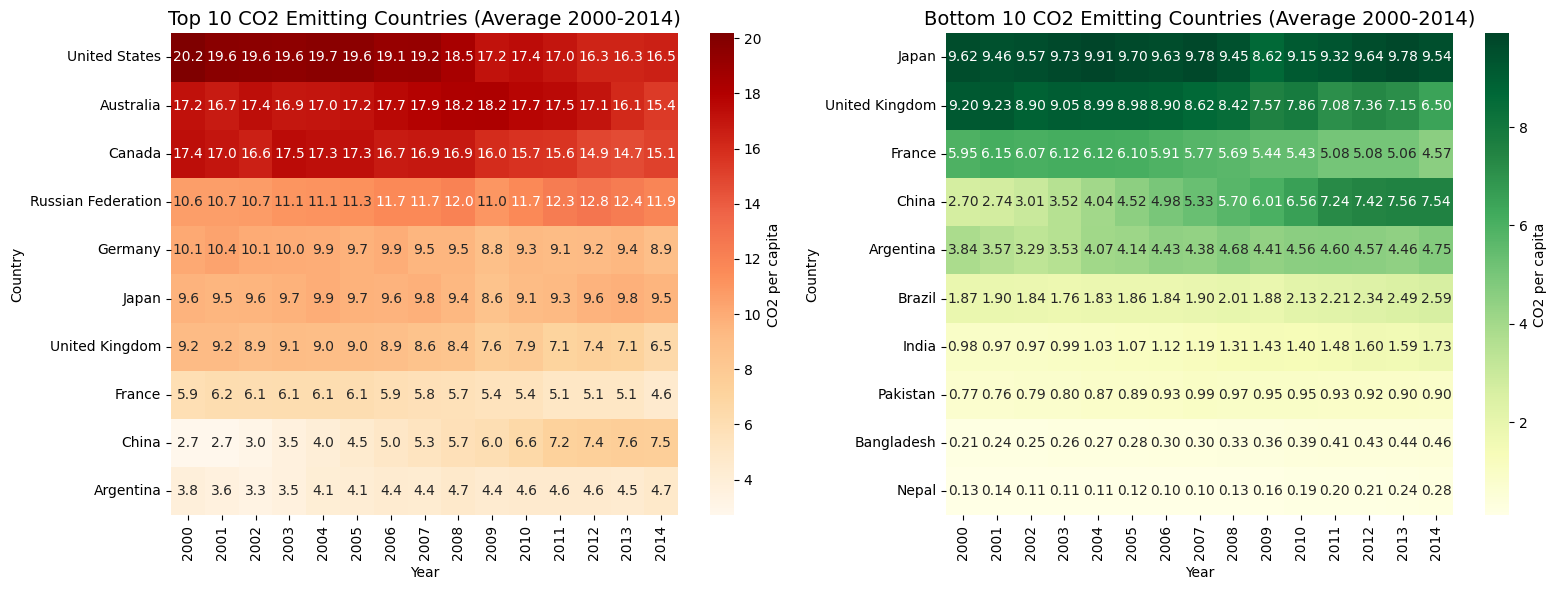

In [ ]:
# Calculate average emissions for each country
average_emissions = heatmap_data.mean(axis=1).sort_values(ascending=False)

# Top 10 highest emitting countries
top_10 = average_emissions.head(10)

# Bottom 10 lowest emitting countries
bottom_10 = average_emissions.tail(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 heatmap
sns.heatmap(
    heatmap_data.loc[top_10.index],
    annot=True,
    fmt=".1f",
    cmap="OrRd",  # Orange-Red for high values
    ax=axes[0],
    cbar_kws={'label': 'CO2 per capita'}
)
axes[0].set_title('Top 10 CO2 Emitting Countries (Average 2000-2014)', fontsize=14)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Country')

# Bottom 10 heatmap
sns.heatmap(
    heatmap_data.loc[bottom_10.index],
    annot=True,
    fmt=".2f",  # 2 decimals for small numbers
    cmap="YlGn",  # Yellow-Green for low values
    ax=axes[1],
    cbar_kws={'label': 'CO2 per capita'}
)
axes[1].set_title('Bottom 10 CO2 Emitting Countries (Average 2000-2014)', fontsize=14)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Country')

plt.tight_layout()
plt.show()

### Step 9: Yearly Trends Analysis

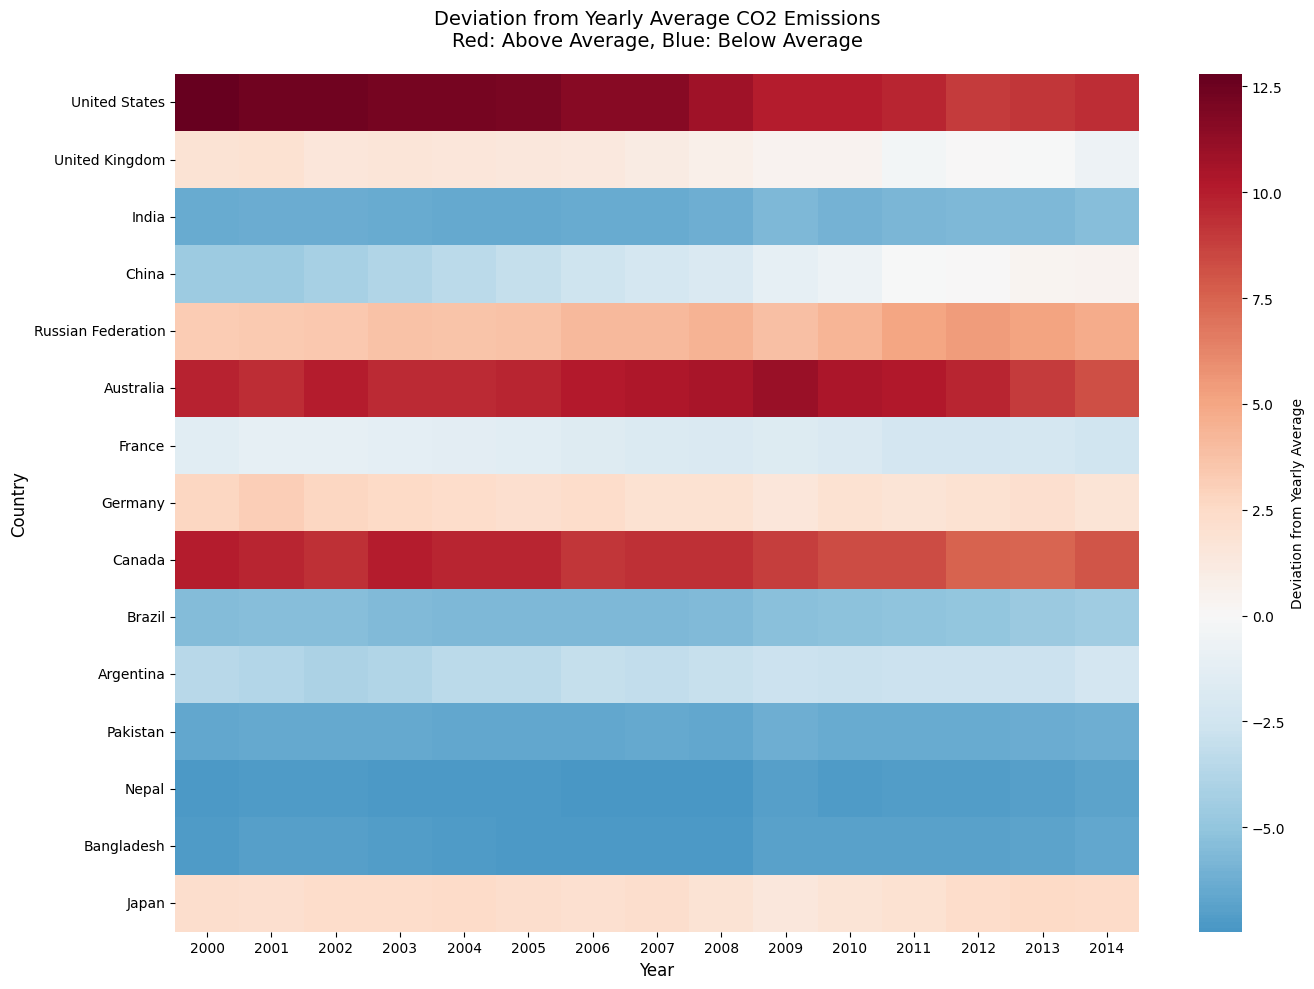

In [ ]:
# Calculate yearly averages
yearly_averages = heatmap_data.mean()

# Create a heatmap focusing on deviation from yearly average
deviation_data = heatmap_data.sub(yearly_averages, axis=1)

plt.figure(figsize=(14, 10))
sns.heatmap(
    data=deviation_data,
    annot=False,  # Too many values for annotations
    cmap="RdBu_r",  # Red-Blue diverging palette
    center=0,  # Center at 0 (above/below average)
    cbar_kws={'label': 'Deviation from Yearly Average'}
)

plt.title('Deviation from Yearly Average CO2 Emissions\nRed: Above Average, Blue: Below Average',
          fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

### Step 10: Complete Analysis Code

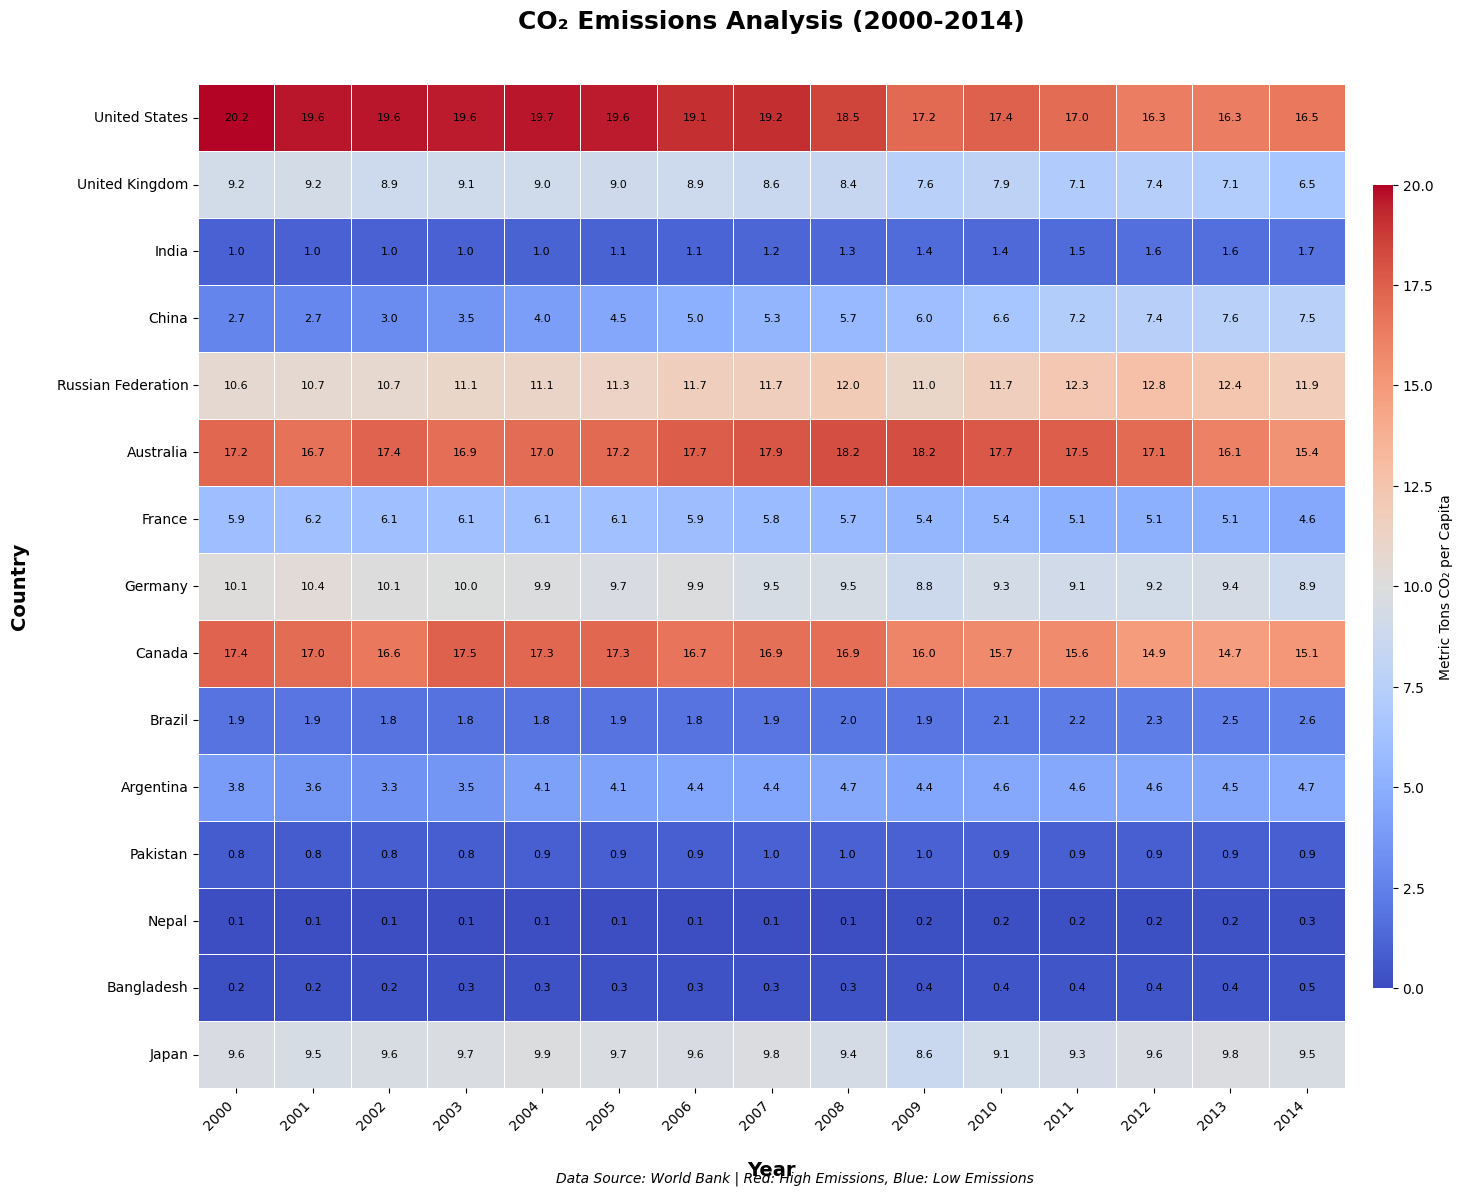

In [ ]:
def create_comprehensive_heatmap(df, title_suffix=""):
    """
    Creates a comprehensive heatmap with all parameters explained
    """
    # Prepare data
    year_cols = [str(y) for y in range(2000, 2015)]
    heatmap_data = df.set_index('Country Name')[year_cols].apply(pd.to_numeric)

    # Create figure
    plt.figure(figsize=(16, 12))

    # Create heatmap with detailed parameters
    ax = sns.heatmap(
        # Core parameters
        data=heatmap_data,
        annot=True,
        fmt=".1f",
        cmap="coolwarm",

        # Style parameters
        linewidths=0.5,
        linecolor='white',
        square=False,

        # Color bar customization
        cbar=True,
        cbar_kws={
            'label': 'Metric Tons CO₂ per Capita',
            'orientation': 'vertical',
            'shrink': 0.8,
            'pad': 0.02,
            'aspect': 40
        },

        # Scale parameters
        vmin=0,
        vmax=20,
        center=None,

        # Annotation customization
        annot_kws={
            "size": 8,
            "color": "black",
            "weight": "normal"
        }
    )

    # Customize plot
    plt.title(f'CO₂ Emissions Analysis {title_suffix}\n',
              fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('\nYear', fontsize=14, fontweight='bold')
    plt.ylabel('Country\n', fontsize=14, fontweight='bold')

    # Rotate x-tick labels
    plt.xticks(rotation=45, ha='right')

    # Add grid for better readability
    ax.grid(False)

    # Add a descriptive text
    plt.figtext(0.5, 0.01,
                'Data Source: World Bank | Red: High Emissions, Blue: Low Emissions',
                ha='center', fontsize=10, style='italic')

    plt.tight_layout()
    plt.show()

    # Return the data for further analysis
    return heatmap_data

# Use the function
analysis_data = create_comprehensive_heatmap(df, "(2000-2014)")

### Key Insights from This Analysis:

**1. Patterns Visible:**

• USA has the highest per capita emissions but shows decreasing trend

• China shows rapid increase in emissions

• European countries show decreasing trends

• Developing countries have low but increasing emissions

**2. Color Interpretation:**

• Red/Orange: High emissions (>10 tons/capita)

• Yellow: Moderate emissions (5-10 tons/capita)

• Blue: Low emissions (<5 tons/capita)

**3. Parameter Learning:**

• annot=True helps see exact values

• fmt=".1f" controls decimal precision

• cmap choice depends on data type (sequential/diverging)

• vmin/vmax ensures consistent color scaling

• cbar_kws customizes the color bar